<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana8/ECalor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
x = np.linspace(0,1,100)
#x

In [27]:
T = np.zeros_like(x)
# Condiciones de frontera
T[0] = 10
T[-1] = 100
T

array([ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       100.])

In [28]:
A = np.zeros((x.shape[0]-2,x.shape[0]-2))
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
b = np.zeros(x.shape[0]-2)
b[0] = -T[0]
b[-1] = -T[-1]
b

array([ -10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0., -100.])

In [30]:
A[0,0] = -2
A[0,1] = 1
A[-1,-1] = -2
A[-1,-2] = 1
A

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [31]:
for i in range(1,A.shape[0]-1):
  for j in range(1,A.shape[1]-1):
    if i == j:
      A[i,j] = -2
      A[i,i-1] = 1
      A[i,i+1] = 1

In [32]:
A

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [34]:
# trampa
#np.linalg.solve(A,b)


In [37]:
def GaussSeidel(A,b,x0, itmax = 10000, tolerancia = 1e-3):

  x = x0.copy()

  for it in range(itmax):

    # Hacemos una copia del vector x
    x_new = np.copy(x)

    for i in range(A.shape[0]):

      # Contabilizamos la suma del iterador
      Suma = 0.
      for j in range(A.shape[1]):
        if i != j:
          Suma += A[i,j]*x_new[j]
          # La diferencia radica en que ahora la suma es
          # calcula usando x_new recien actualizado
        x_new[i] = (b[i] - Suma)/A[i,i]

    #print(x_new)

    if it%100 ==0:
      print(it, np.linalg.norm( np.dot(A,x_new)-b))
    # Criterio de convergencia
    if np.linalg.norm( np.dot(A,x_new)-b) < tolerancia:
      break

    x = np.copy(x_new)

  print(it)

  return x, it

In [38]:
T0 = np.zeros(T.shape[0]-2)
Tf,_ = GaussSeidel(A,b,T0)
Tf

0 50.083264004389065
100 1.0367559170329819
200 0.6143910220151042
300 0.4595604254412014
400 0.37737276318132573
500 0.3239302725918075
600 0.28468103258291083
700 0.2535042441480868
800 0.22740737469958386
900 0.20481566769974827
1000 0.18485905148779122
1100 0.1670269885666932
1200 0.15099416473737998
1300 0.13653250606130282
1400 0.12346714190442884
1500 0.11165444390182322
1600 0.10097099406244087
1700 0.09130790171493079
1800 0.0825677186379457
1900 0.07466261389784419
2000 0.06751316462909669
2100 0.061047456659095736
2200 0.055200351086515304
2300 0.04991284981012642
2400 0.045131528846188686
2500 0.04080802460953613
2600 0.036898565559134226
2700 0.03336354467614599
2800 0.030167129479662647
2900 0.027276906762485256
3000 0.024663559421062804
3100 0.02230057286299371
3200 0.020163968574424925
3300 0.01823206254580765
3400 0.016485246385609977
3500 0.014905789094821055
3600 0.013477657623281614
3700 0.012186354476925577
3800 0.011018770788588672
3900 0.00996305340226378
4000 0.

array([10.90450292, 11.80901507, 12.71354106, 13.61808547, 14.52265285,
       15.42724775, 16.33187465, 17.23653801, 18.14124226, 19.04599178,
       19.95079088, 20.85564384, 21.76055487, 22.66552812, 23.57056766,
       24.47567752, 25.38086163, 26.28612385, 27.19146795, 28.09689763,
       29.00241647, 29.90802799, 30.8137356 , 31.71954261, 32.62545222,
       33.53146753, 34.43759153, 35.3438271 , 36.250177  , 37.15664387,
       38.06323025, 38.96993852, 39.87677096, 40.78372973, 41.69081685,
       42.59803419, 43.50538352, 44.41286645, 45.32048448, 46.22823894,
       47.13613104, 48.04416186, 48.95233232, 49.86064321, 50.76909517,
       51.67768869, 52.58642415, 53.49530175, 54.40432157, 55.31348354,
       56.22278743, 57.1322329 , 58.04181944, 58.95154641, 59.86141303,
       60.77141838, 61.68156141, 62.5918409 , 63.50225553, 64.41280383,
       65.3234842 , 66.2342949 , 67.14523407, 68.05629972, 68.96748975,
       69.8788019 , 70.79023382, 71.70178303, 72.61344694, 73.52

In [39]:
T[1:-1] = Tf

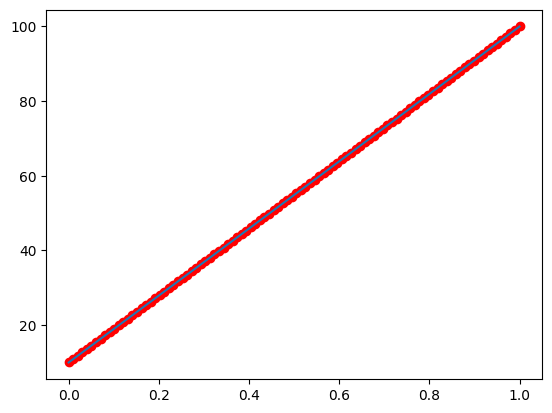

In [40]:
plt.plot(x,T)
plt.scatter(x,T,color='r')